# <center> MVA : Deep Learning </center>
## <center> Project: Image Classification and Regression </center>
## <center> Reda BAHI SLAOUI - reda.bahi-slaoui@eleves.enpc.fr </center>

## Helper functions (mp1.py)

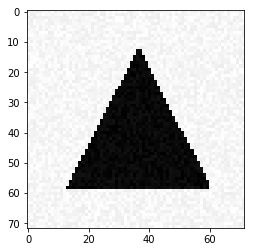

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



## 1. Simple Classification

### Using SGD with learning rate = 0.001

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

model = Sequential()
nb_neurons = 32

model.add(Dense(nb_neurons, input_shape=(IMAGE_SIZE*IMAGE_SIZE,), activation = 'relu'))
model.add(Dense(3, activation='softmax'))

from keras.optimizers import SGD
sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                165920    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 166,019
Trainable params: 166,019
Non-trainable params: 0
_________________________________________________________________
None


Generate the training data and fit the model :

In [4]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = np_utils.to_categorical(Y_train, 3)
history = model.fit(X_train, Y_train, epochs=50, batch_size=32)

Creating data:
0
100
200
Epoch 1/50
300/300 [==============================] - 1s 2ms/step - loss: 1.0865 - acc: 0.4533
Epoch 2/50
300/300 [==============================] - 0s 170us/step - loss: 0.7216 - acc: 0.6367
Epoch 3/50
300/300 [==============================] - 0s 173us/step - loss: 0.5760 - acc: 0.7467
Epoch 4/50
300/300 [==============================] - 0s 183us/step - loss: 0.4193 - acc: 0.8300
Epoch 5/50
300/300 [==============================] - 0s 180us/step - loss: 0.3638 - acc: 0.8867
Epoch 6/50
300/300 [==============================] - 0s 180us/step - loss: 0.2629 - acc: 0.9433
Epoch 7/50
300/300 [==============================] - 0s 180us/step - loss: 0.2813 - acc: 0.9033
Epoch 8/50
300/300 [==============================] - 0s 160us/step - loss: 0.2312 - acc: 0.9400
Epoch 9/50
300/300 [==============================] - 0s 176us/step - loss: 0.2175 - acc: 0.9367
Epoch 10/50
300/300 [==============================] - 0s 180us/step - loss: 0.1783 - acc: 0.9733
Epoch 

Plot the training loss : 

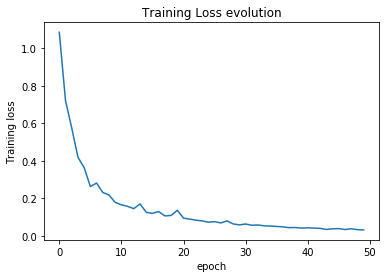

In [5]:
plt.plot(history.history['loss'])
plt.title('Training Loss evolution')
plt.ylabel('Training loss')
plt.xlabel('epoch')
plt.show()

Test the model on an example :

In [6]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

### Using ADAM :

In [7]:
model = Sequential()
nb_neurons = 32

model.add(Dense(nb_neurons, input_shape=(IMAGE_SIZE*IMAGE_SIZE,), activation = 'relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer="Adam", metrics=['accuracy'])

[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = np_utils.to_categorical(Y_train, 3)
history = model.fit(X_train, Y_train, epochs=50, batch_size=32)

Creating data:
0
100
200
Epoch 1/50
300/300 [==============================] - 0s 887us/step - loss: 1.7538 - acc: 0.4400
Epoch 2/50
300/300 [==============================] - 0s 223us/step - loss: 1.0043 - acc: 0.4500
Epoch 3/50
300/300 [==============================] - 0s 245us/step - loss: 0.7398 - acc: 0.7100
Epoch 4/50
300/300 [==============================] - 0s 229us/step - loss: 0.5965 - acc: 0.7100
Epoch 5/50
300/300 [==============================] - 0s 183us/step - loss: 0.5815 - acc: 0.7500
Epoch 6/50
300/300 [==============================] - 0s 275us/step - loss: 0.4724 - acc: 0.8000
Epoch 7/50
300/300 [==============================] - 0s 226us/step - loss: 0.3242 - acc: 0.9033
Epoch 8/50
300/300 [==============================] - 0s 189us/step - loss: 0.2434 - acc: 0.9700
Epoch 9/50
300/300 [==============================] - 0s 186us/step - loss: 0.2233 - acc: 0.9800
Epoch 10/50
300/300 [==============================] - 0s 234us/step - loss: 0.1883 - acc: 0.9933
Epoc

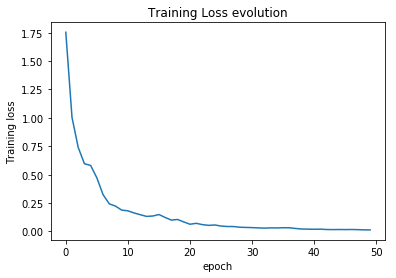

In [8]:
plt.plot(history.history['loss'])
plt.title('Training Loss evolution')
plt.ylabel('Training loss')
plt.xlabel('epoch')
plt.show()

Both optimizers work well for this example, however, in general, a small learning rate for the SGD means slow convergence, and therefore it is better to make the learning rate adaptative, i.e smaller and smaller as the training goes on.

## 2. Visualization of the Solution

Visualization of the 32 neurons : 

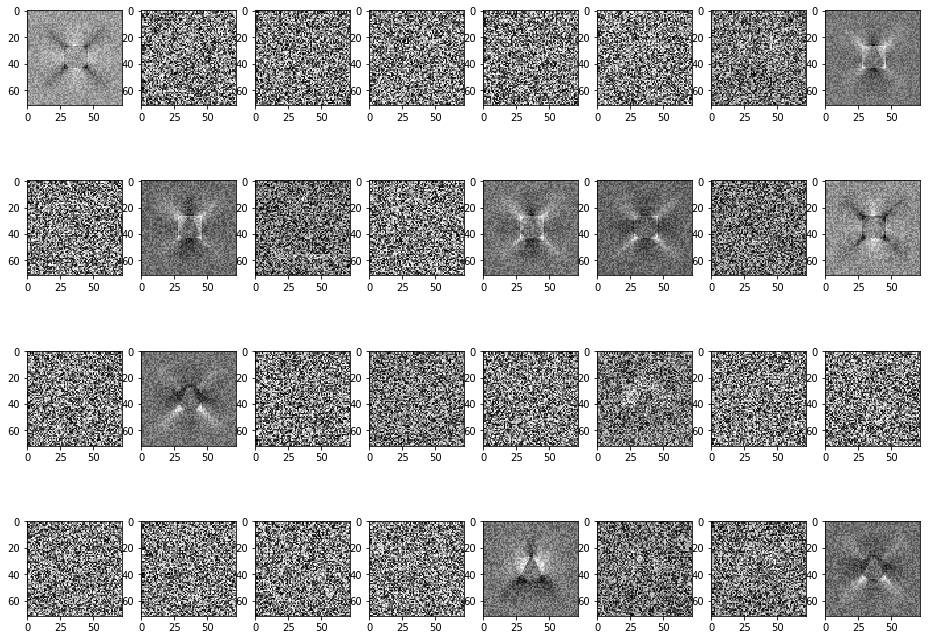

In [9]:
w = model.get_weights()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.figure(figsize=(16,12))
for i in range(nb_neurons):    
    plt.subplot(4,8,1+i)
    plt.imshow(w[0][:,i].reshape(72,72),cmap="gray")
plt.show()

## 3. A More Difficult Classification Problem

### Retraining the model on the new training set

In [10]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
Y_train = np_utils.to_categorical(Y_train,3)
[X_test, Y_test] = generate_test_set_classification()

model = Sequential()
nb_neurons = 32

model.add(Dense(nb_neurons, input_shape=(IMAGE_SIZE*IMAGE_SIZE,), activation = 'relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer="Adam", metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=32)


Creating data:
0
100
200
Creating data:
0
100
200
Epoch 1/50
300/300 [==============================] - 0s 1ms/step - loss: 1.8244 - acc: 0.3700
Epoch 2/50
300/300 [==============================] - 0s 196us/step - loss: 1.1011 - acc: 0.3033
Epoch 3/50
300/300 [==============================] - 0s 186us/step - loss: 1.0988 - acc: 0.3033
Epoch 4/50
300/300 [==============================] - 0s 254us/step - loss: 1.0988 - acc: 0.3033
Epoch 5/50
300/300 [==============================] - 0s 182us/step - loss: 1.0986 - acc: 0.3333
Epoch 6/50
300/300 [==============================] - 0s 266us/step - loss: 1.0985 - acc: 0.3867
Epoch 7/50
300/300 [==============================] - 0s 226us/step - loss: 1.0984 - acc: 0.3633
Epoch 8/50
300/300 [==============================] - 0s 229us/step - loss: 1.0982 - acc: 0.3633
Epoch 9/50
300/300 [==============================] - 0s 246us/step - loss: 1.0981 - acc: 0.3633
Epoch 10/50
300/300 [==============================] - 0s 283us/step - loss: 1.

In [11]:
loss, acc = model.evaluate(X_test,Y_test)
print("Loss on test set : {} , Accuracy on test set : {}".format(loss, acc))

300/300 [==============================] - 0s 293us/step
Loss on test set : 1.1009938033421833 , Accuracy on test set : 0.33


### Using a Convolutional neural network : 

In [12]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

[X_train, Y_train] = generate_dataset_classification(500, 20, True)
Y_train = np_utils.to_categorical(Y_train,3)

# Reshape train and test inputs
X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1) 
X_train = X_train.astype('float32')

X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1) 
X_test = X_test.astype('float32')

modelCNN = Sequential()
modelCNN.add(Conv2D(32, (5,5), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
modelCNN.add(MaxPooling2D(pool_size=(4, 4))) 
modelCNN.add(Dropout(0.25)) 
modelCNN.add(Flatten()) 
modelCNN.add(Dense(128, activation='relu'))           
modelCNN.add(Dropout(0.5)) 
modelCNN.add(Dense(3, activation='softmax')) 
modelCNN.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
print(modelCNN.summary())

Creating data:
0
100
200
300
400
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1183872   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)     

In [13]:
modelCNN.fit(X_train, Y_train,  batch_size=32, epochs=30, verbose=1)

Epoch 1/30
500/500 [==============================] - 3s 6ms/step - loss: 1.1127 - acc: 0.4160
Epoch 2/30
500/500 [==============================] - 3s 6ms/step - loss: 0.8924 - acc: 0.6360
Epoch 3/30
500/500 [==============================] - 3s 5ms/step - loss: 0.7548 - acc: 0.6880
Epoch 4/30
500/500 [==============================] - 3s 5ms/step - loss: 0.6652 - acc: 0.7620
Epoch 5/30
500/500 [==============================] - 3s 6ms/step - loss: 0.5798 - acc: 0.7980
Epoch 6/30
500/500 [==============================] - 3s 5ms/step - loss: 0.5474 - acc: 0.8060
Epoch 7/30
500/500 [==============================] - 3s 5ms/step - loss: 0.4852 - acc: 0.8520
Epoch 8/30
500/500 [==============================] - 3s 5ms/step - loss: 0.4549 - acc: 0.8620
Epoch 9/30
500/500 [==============================] - 3s 6ms/step - loss: 0.3968 - acc: 0.8660
Epoch 10/30
500/500 [==============================] - 3s 5ms/step - loss: 0.3397 - acc: 0.9000
Epoch 11/30
500/500 [============================

In [14]:
loss, acc = modelCNN.evaluate(X_test,Y_test)
print("Loss on test set : {} , Accuracy on test set : {}".format(loss, acc))

300/300 [==============================] - 1s 2ms/step
Loss on test set : 0.4149639884630839 , Accuracy on test set : 0.8733333325386048


## 4. A Regression Problem

Generate the data for regression : 

In [15]:
[X_train2, Y_train2] = generate_dataset_regression(300, 20)
[X_test2, Y_test2] = generate_test_set_regression()

Creating data:
0
100
200
Creating data:
0
100
200


Visualize a training sample : 

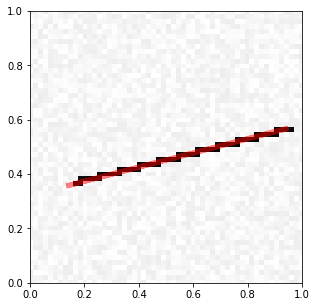

In [16]:
visualize_prediction(X_train2[0], Y_train2[0])

The model : 

In [17]:
model2 = Sequential()
model2.add(Conv2D(16, (5,5), input_shape = (IMAGE_SIZE,IMAGE_SIZE,1), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(32, (3,3), input_shape = (IMAGE_SIZE,IMAGE_SIZE,1), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(64, (2,2), input_shape = (IMAGE_SIZE,IMAGE_SIZE,1), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(128, (2,2), input_shape = (IMAGE_SIZE,IMAGE_SIZE,1), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Dropout(0.25))

#model2.add(Conv2D(128, (5, 5), activation='relu'))
#model2.add(Dropout(0.25))
#model2.add(Conv2D(128, (5, 5), activation='relu'))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.40))
model2.add(Dense(6))
model2.compile(loss='mean_squared_error', optimizer='adam')

print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 128)         32896     
__________

We need to sort the vertices of the triangles : 

In [18]:
def sort_t(Y):
    Y_copy = Y.reshape(-1, 3, 2).copy()
    for i, e in enumerate(np.argsort(Y[:, ::2], axis=1)):
        Y_copy[i, :] = Y_copy[i,e]
    return Y_copy.reshape(-1, 6)

Y_train2_sorted = sort_t(Y_train2)
Y_test2_sorted = sort_t(Y_test2)



In [19]:
X_train2 = X_train2.reshape(X_train2.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1) 
X_train2 = X_train2.astype('float32')

X_test2 = X_test2.reshape(X_test2.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1) 
X_test2 = X_test2.astype('float32')

model2.fit(X_train2, Y_train2_sorted, epochs=40, batch_size=32)

Epoch 1/40
300/300 [==============================] - 18s 61ms/step - loss: 0.1214
Epoch 2/40
300/300 [==============================] - 18s 59ms/step - loss: 0.0673
Epoch 3/40
300/300 [==============================] - 18s 61ms/step - loss: 0.0564
Epoch 4/40
300/300 [==============================] - 18s 59ms/step - loss: 0.0443
Epoch 5/40
300/300 [==============================] - 18s 61ms/step - loss: 0.0384
Epoch 6/40
300/300 [==============================] - 19s 62ms/step - loss: 0.0358
Epoch 7/40
300/300 [==============================] - 19s 63ms/step - loss: 0.0308
Epoch 8/40
300/300 [==============================] - 18s 59ms/step - loss: 0.0281
Epoch 9/40
300/300 [==============================] - 18s 62ms/step - loss: 0.0249
Epoch 10/40
300/300 [==============================] - 18s 59ms/step - loss: 0.0254
Epoch 11/40
300/300 [==============================] - 18s 60ms/step - loss: 0.0223
Epoch 12/40
300/300 [==============================] - 18s 59ms/step - loss: 0.0197
E

In [20]:
model2.evaluate(X_test2,Y_test2_sorted)

300/300 [==============================] - 1s 3ms/step


0.011546101992328962

Visualize some examples : 

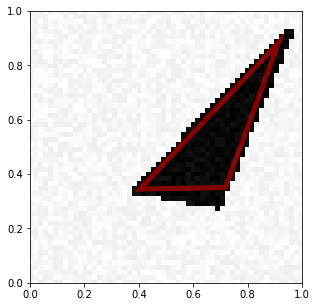

In [21]:
visualize_prediction(X_test2[0],model2.predict(X_test2)[0])

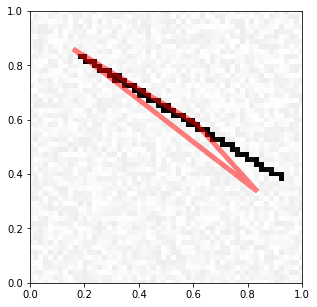

In [22]:
visualize_prediction(X_test2[3],model2.predict(X_test2)[3])

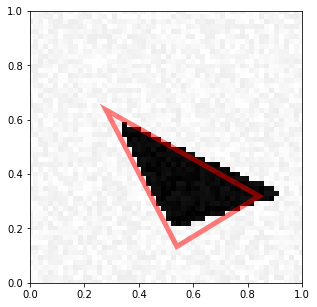

In [23]:
visualize_prediction(X_test2[31],model2.predict(X_test2)[31])

## 5.  Image Denoising

The following funtion generates pairs of images, where one image is noisy, and the second one is not noisy

In [24]:
def generate_dataset_noise_clean(nb_samples, free_location=False):
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Xnoise = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = 0 
        if category == 0:
            noise = np.random.randint(0,255)
            X[i] = generate_a_rectangle(noise, free_location)
            Xnoise[i] = (X[i] + noise) / (255 + 2 * noise)
        elif category == 1: 
            noise = np.random.randint(0,255)
            X[i] = generate_a_disk(noise, free_location)
            Xnoise[i] = (X[i] + noise) / (255 + 2 * noise)
        else:
            noise = np.random.randint(0,255)
            [X[i], V] = generate_a_triangle(noise, free_location)
            Xnoise[i] = (X[i] + noise) / (255 + 2 * noise)
      
    X = X/255
    return [Xnoise, X]

X_train_noise, X_train_clean = generate_dataset_noise_clean(300)

X_test_noise, X_test_clean = generate_dataset_noise_clean(300)

Creating data:
0
100
200
Creating data:
0
100
200


In [25]:
X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1) 
X_train_noise = X_train_noise.astype('float32')
X_train_clean = X_train_clean.reshape(X_train_clean.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1) 
X_train_clean = X_train_clean.astype('float32')

X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1) 
X_test_noise = X_test_noise.astype('float32')
X_test_clean = X_test_clean.reshape(X_test_clean.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1) 
X_test_clean = X_test_clean.astype('float32')

The model (I use upsampling to return a IMAGE_SIZE x IMAGE_SIZE image) 

In [26]:
from keras.layers import UpSampling2D

modelHG = Sequential()
modelHG.add(Conv2D(32, (3, 3), activation='relu', input_shape = (IMAGE_SIZE,IMAGE_SIZE,1)))
modelHG.add(MaxPooling2D(pool_size = (2, 2)))
modelHG.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
modelHG.add(MaxPooling2D((2, 2), padding='same'))
modelHG.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
modelHG.add(MaxPooling2D((2, 2), padding='same'))
modelHG.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
modelHG.add(UpSampling2D((8, 8)))
modelHG.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

modelHG.compile(loss='mean_squared_error', optimizer='adam')
print(modelHG.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 70, 70, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 35, 35, 16)        4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 9, 9, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 8)           584       
__________

In [27]:
modelHG.fit(X_train_noise, X_train_clean,epochs=30,batch_size=32)

Epoch 1/30
300/300 [==============================] - 8s 27ms/step - loss: 0.4453
Epoch 2/30
300/300 [==============================] - 8s 25ms/step - loss: 0.2845
Epoch 3/30
300/300 [==============================] - 7s 23ms/step - loss: 0.2345
Epoch 4/30
300/300 [==============================] - 7s 23ms/step - loss: 0.2285
Epoch 5/30
300/300 [==============================] - 7s 24ms/step - loss: 0.2027
Epoch 6/30
300/300 [==============================] - 7s 24ms/step - loss: 0.1714
Epoch 7/30
300/300 [==============================] - 7s 24ms/step - loss: 0.1475
Epoch 8/30
300/300 [==============================] - 8s 25ms/step - loss: 0.1391
Epoch 9/30
300/300 [==============================] - 8s 25ms/step - loss: 0.1348
Epoch 10/30
300/300 [==============================] - 8s 26ms/step - loss: 0.1313
Epoch 11/30
300/300 [==============================] - 7s 24ms/step - loss: 0.1283
Epoch 12/30
300/300 [==============================] - 7s 25ms/step - loss: 0.1262
Epoch 13/30
3

In [28]:
modelHG.evaluate(X_test_noise, X_test_clean)

300/300 [==============================] - 1s 3ms/step


0.1069706862171491

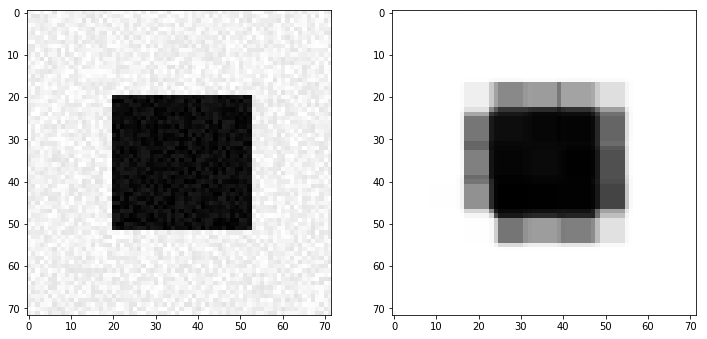

In [29]:
plt.figure(figsize=(12, 12))
ax = plt.subplot(1, 2, 1)
plt.imshow(X_test_noise[1].reshape(IMAGE_SIZE, IMAGE_SIZE),cmap='gray')
ax = plt.subplot(1, 2, 2)
plt.imshow(modelHG.predict(X_test_noise)[1].reshape(IMAGE_SIZE, IMAGE_SIZE),cmap='gray')
plt.show()